In [2]:
import pandas as pd
from utilities import *
pd.set_option("display.max_rows", 366)

In [62]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
fires, aqi = load_data()

## Number of Fires by Year

Seems to roughly match the statistics from https://fas.org/sgp/crs/misc/IF10244.pdf for the year 2015

In [4]:
fires_by_year = fires.groupby("FIRE_YEAR")

In [5]:
fires_by_year.size()

FIRE_YEAR
1992    33773
1993    33977
1994    36075
1995    40816
1996    41483
1997    24261
1998    23598
1999    32295
2000    39843
2001    37670
2002    33562
2003    40419
2004    43999
2005    62889
2006    88106
2007    73367
2008    70146
2009    63803
2010    63121
2011    72489
2012    62442
2013    58411
2014    61341
2015    63344
dtype: int64

In [7]:
# Number of acres burned by year
acres_burned_by_year = fires.groupby("FIRE_YEAR")
acres_burned_by_year['FIRE_SIZE'].sum()

FIRE_YEAR
1992    4.330941e+05
1993    4.017944e+05
1994    6.329064e+05
1995    5.131534e+05
1996    8.243400e+05
1997    2.771874e+05
1998    6.011231e+05
1999    3.026783e+06
2000    3.038503e+06
2001    2.139176e+06
2002    1.836951e+06
2003    1.755565e+06
2004    1.040198e+06
2005    3.944271e+06
2006    8.253112e+06
2007    7.266372e+06
2008    4.516456e+06
2009    2.546274e+06
2010    1.968821e+06
2011    6.128886e+06
2012    7.936838e+06
2013    2.888591e+06
2014    3.181756e+06
2015    6.260638e+06
Name: FIRE_SIZE, dtype: float64

<IPython.core.display.Javascript object>


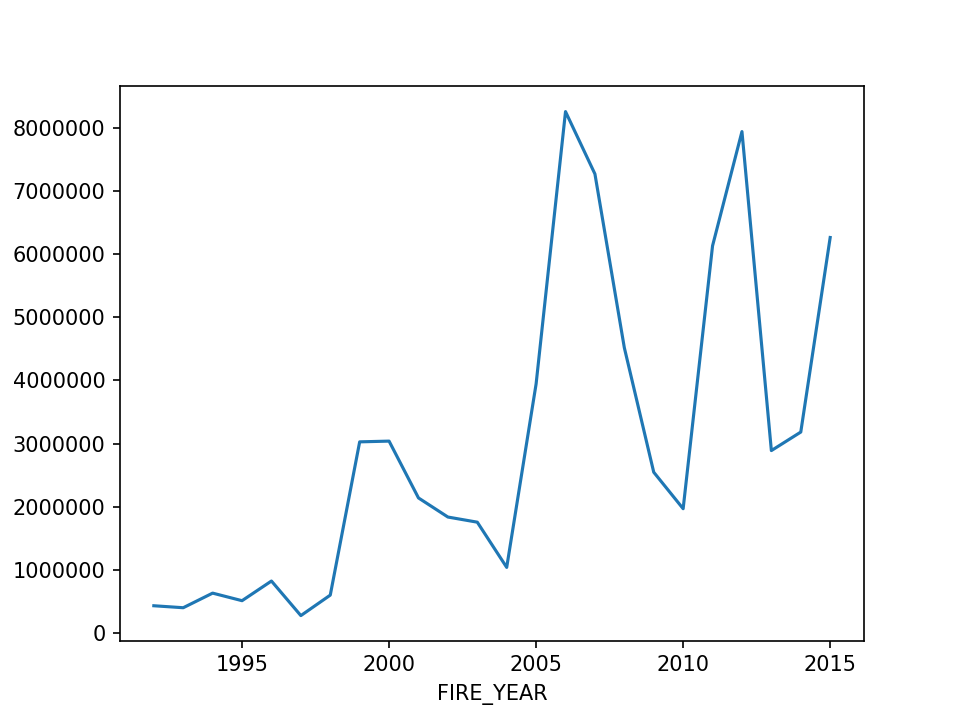

In [45]:
%matplotlib notebook
acres_burned = acres_burned_by_year['FIRE_SIZE'].sum()
acres_burned.plot.line()

In [8]:
fires_by_year.get_group(2006)

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE
30,HANGER FIRE,2006,0.1,2006-05-23,2006-05-23,Debris Burning,Alaska,Kenai Peninsula,2,122
31,DUNLEAVEY FIRE,2006,0.1,2006-05-25,2006-05-25,Debris Burning,Alaska,Kenai Peninsula,2,122
32,FIRECRACKER,2006,0.1,2006-07-04,2006-07-04,Campfire,Alaska,Kenai Peninsula,2,122
33,GWINS FIRE,2006,0.1,2006-07-10,2006-07-10,Campfire,Alaska,Kenai Peninsula,2,122
34,MILE 15.5 FIRE,2006,0.1,2006-08-07,2006-08-08,Campfire,Alaska,Kenai Peninsula,2,122
...,...,...,...,...,...,...,...,...,...,...
1200576,GOOSE EGG,2006,0.1,2006-08-06,2006-08-06,Lightning,Wyoming,Natrona,56,25
1200577,PITCH PINE,2006,1.5,2006-08-07,2006-08-09,Lightning,Wyoming,Natrona,56,25
1200578,JACKSON CANYON,2006,11765.0,2006-08-14,2006-08-29,Lightning,Wyoming,Natrona,56,25
1200579,WIENKE,2006,0.1,2006-08-19,2006-08-19,Lightning,Wyoming,Natrona,56,25


## Investigate Stated Causes of Fires

In [9]:
fires_2006 = fires_by_year.get_group(2006)
fires_1998 = fires_by_year.get_group(1998)

causes_2006 = fires_2006.groupby("STAT_CAUSE_DESCR")
causes_1998 = fires_1998.groupby("STAT_CAUSE_DESCR")

In [10]:
causes_1998.size().sort_values(ascending=False)

STAT_CAUSE_DESCR
Arson                4488
Debris Burning       4392
Lightning            4030
Miscellaneous        2786
Equipment Use        2265
Railroad             1393
Missing/Undefined    1200
Campfire             1021
Children              808
Smoking               802
Powerline             257
Fireworks             107
Structure              49
dtype: int64

In [11]:
causes_2006.size().sort_values(ascending=False)

STAT_CAUSE_DESCR
Debris Burning       22261
Miscellaneous        17147
Lightning            14172
Arson                13074
Equipment Use         7205
Missing/Undefined     6214
Smoking               2373
Children              2317
Campfire              2221
Railroad               901
Powerline              163
Fireworks               41
Structure               17
dtype: int64

### Top 20 state-counties with the most wildfires in 2006

In [13]:
# We can groupby FIPS_STATE and FIPS_CODE, but easier for humans to read if we groupby STATE, COUNTY_NAME
county_state_2006 = fires_2006.groupby(["STATE_NAME", "COUNTY_NAME"])
county_state_2006.size().sort_values(ascending=False)[:20]

STATE_NAME  COUNTY_NAME
New York    Suffolk        738
Arizona     Coconino       669
Hawaii      Honolulu       550
New York    Orange         381
Minnesota   St Louis       347
Texas       Atascosa       346
New York    Nassau         337
Oregon      Grant          333
Idaho       Idaho          325
Arizona     Mohave         318
New York    Erie           313
Texas       Wood           309
California  Riverside      308
New York    Monroe         305
Louisiana   Beauregard     300
Alabama     Mobile         297
Montana     Lincoln        292
Louisiana   St Tammany     289
Texas       Smith          283
California  Los Angeles    283
dtype: int64

Top 10 states with the most wildfires in 2006


In [14]:
# We can groupby FIPS_STATE and FIPS_CODE, but easier for humans to read if we groupby STATE, COUNTY_NAME
state_2006 = fires_2006.groupby(["STATE_NAME"])
state_2006.size().sort_values(ascending=False)[:10]

STATE_NAME
Texas             14597
Georgia            8868
New York           6610
North Carolina     5010
Florida            4723
Alabama            3936
California         3367
Oregon             3036
Louisiana          3013
South Carolina     2836
dtype: int64

In [17]:
# Top 10 states with most wildfires alltime 1992-2015
state = fires.groupby(["STATE_NAME"])
state.size().sort_values(ascending=False)[:10]

STATE_NAME
Georgia           150234
Texas             136462
Florida            83601
New York           80018
California         56221
South Carolina     53341
Mississippi        48295
North Carolina     47592
Alabama            41560
Oregon             40178
dtype: int64

### States with most acres burned based on fire size

In [18]:
state["FIRE_SIZE"].sum().sort_values(ascending=False)[:20]

STATE_NAME
Idaho          9.591734e+06
Texas          7.953988e+06
Nevada         7.421757e+06
California     6.524384e+06
Oregon         5.792585e+06
New Mexico     4.187921e+06
Montana        3.628712e+06
Washington     3.057350e+06
Florida        3.032167e+06
Utah           2.886954e+06
Arizona        2.553902e+06
Alaska         2.285323e+06
Oklahoma       1.530667e+06
Wyoming        1.501708e+06
Colorado       1.208078e+06
Minnesota      8.183956e+05
Kansas         7.970291e+05
Georgia        7.519269e+05
Mississippi    7.162935e+05
Alabama        5.979095e+05
Name: FIRE_SIZE, dtype: float64

### California acres burned by year

In [20]:
CA = get_fires(fires, state="California")
AL = get_fires(fires, state="Alaska")
ID = get_fires(fires, state="Idaho")

In [21]:
CA.groupby("FIRE_YEAR")["FIRE_SIZE"].sum()

FIRE_YEAR
1997         14.90
1998      15709.70
1999      73361.80
2000      41184.70
2001      95824.30
2002     138900.50
2003     283607.74
2004      95108.67
2005      60821.50
2006     672051.94
2007     910144.52
2008    1176897.80
2009     356014.33
2010      81301.26
2011      84625.69
2012     711661.13
2013     544348.06
2014     507431.63
2015     675373.61
Name: FIRE_SIZE, dtype: float64

In [22]:
AL.groupby("FIRE_YEAR")["FIRE_SIZE"].sum()

FIRE_YEAR
1997          2.00
2004          0.50
2005        353.25
2006          5.20
2007          4.00
2008          1.20
2009         22.27
2010         14.10
2012          1.20
2013        136.10
2014     198275.08
2015    2086507.76
Name: FIRE_SIZE, dtype: float64

In [24]:
ID.groupby("FIRE_YEAR")["FIRE_SIZE"].sum()

FIRE_YEAR
1992       3196.00
1993        842.70
1994      11735.00
1995       1545.60
1996      27623.10
1997       1432.30
1998       9781.60
1999     382231.42
2000     589100.98
2001     163844.82
2002      72382.15
2003     201862.93
2004      11709.78
2005     600871.83
2006     903992.13
2007    2068452.94
2008     168701.06
2009      23432.81
2010     642887.96
2011     232460.61
2012    1772657.44
2013     738809.00
2014     195085.87
2015     767094.21
Name: FIRE_SIZE, dtype: float64

### For 2006, group by state, county, and date

In [30]:
state_county_date = fires_2006.groupby(["STATE_NAME", "COUNTY_NAME", "DISCOVERY_DATE"])

In [31]:
state_county_date.size()

STATE_NAME  COUNTY_NAME  DISCOVERY_DATE
Alabama     Autauga      2006-01-04        1
                         2006-01-07        2
                         2006-01-08        2
                         2006-01-16        4
                         2006-01-26        1
                                          ..
Wyoming     Weston       2006-06-11        1
                         2006-07-06        1
                         2006-07-12        1
                         2006-07-30        1
                         2006-08-08        1
Length: 57652, dtype: int64

### For 2006, list counties that had the most fires reported in a single day

In [34]:
state_county_date.size().sort_values(ascending=False)[:10]

STATE_NAME  COUNTY_NAME  DISCOVERY_DATE
Oregon      Grant        2006-08-08        55
New York    Orange       2006-04-12        53
Hawaii      Honolulu     2006-07-04        47
Oregon      Klamath      2006-08-06        42
California  Siskiyou     2006-08-07        37
                         2006-07-24        34
Idaho       Idaho        2006-08-09        33
California  Trinity      2006-08-07        30
Louisiana   Beauregard   2006-03-26        29
Oregon      Jackson      2006-08-06        28
dtype: int64

In [33]:
fires.nlargest(10, 'FIRE_SIZE')

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE
863187,LONG DRAW,2012,558198.3,2012-07-08,2012-07-30,Lightning,Oregon,Malheur,41,45
835005,HOLLOWAY,2012,461047.0,2012-08-05,2012-08-31,Lightning,Oregon,Harney,41,25
948618,I-40,2006,427696.0,2006-03-12,2006-03-19,Miscellaneous,Texas,Gray,48,179
434294,MURPHY COMPLEX,2007,367785.0,2007-07-21,2007-08-26,Lightning,Idaho,Owyhee,16,73
1103275,MILFORD FLAT,2007,357185.0,2007-07-06,2007-08-03,Lightning,Utah,Beaver,49,1
128087,RUSH,2012,315578.8,2012-08-12,2012-10-22,Lightning,California,Lassen,6,35
1020269,ROCKHOUSE FIRE,2011,314444.0,2011-04-09,2011-05-12,Miscellaneous,Texas,Jeff Davis,48,243
255,15533 BIG CREEK 2,2015,312918.3,2015-06-22,2015-09-29,Lightning,Alaska,Yukon Koyukuk,2,290
415735,LONG BUTTE,2010,306113.0,2010-08-21,2010-09-02,Lightning,Idaho,Elmore,16,39
696819,WHITEWATER-BALDY,2012,297845.0,2012-05-16,2012-07-31,Lightning,New Mexico,Catron,35,3


In [239]:
get_fires(fires, 'Colorado', 'El Paso', 2012)

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE
142812,COLA,2012,0.5,2012-10-20,2012-10-21,Miscellaneous,Colorado,El Paso,8,41
142813,ENSIGN,2012,0.1,2012-03-25,2012-03-25,Campfire,Colorado,El Paso,8,41
142814,SUNDANCE,2012,0.1,2012-06-10,2012-06-10,Campfire,Colorado,El Paso,8,41
142815,GOLD CAMP,2012,0.1,2012-01-22,2012-01-27,Campfire,Colorado,El Paso,8,41
142816,315,2012,0.1,2012-08-18,2012-08-18,Campfire,Colorado,El Paso,8,41
142817,WALDO CANYON,2012,18947.0,2012-06-23,NaN,Miscellaneous,Colorado,El Paso,8,41
142818,300M,2012,0.1,2012-03-19,2012-03-20,Campfire,Colorado,El Paso,8,41
142819,MT HERMAN,2012,0.5,2012-09-06,2012-09-08,Miscellaneous,Colorado,El Paso,8,41
142820,LOY GULCH,2012,0.1,2012-06-19,2012-06-19,Arson,Colorado,El Paso,8,41
142821,HELEN HUNT,2012,0.1,2012-07-29,2012-07-29,Campfire,Colorado,El Paso,8,41


In [240]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7243237 entries, 0 to 7243236
Data columns (total 11 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   STATE_NAME                 object        
 1   COUNTY_NAME                object        
 2   STATE_CODE                 int64         
 3   COUNTY_CODE                int64         
 4   DATE                       datetime64[ns]
 5   AQI                        int64         
 6   CATEGORY                   object        
 7   DEFINING_PARAMETER         object        
 8   DEFINING_SITE              object        
 9   NUMBER_OF_SITES_REPORTING  int64         
 10  YEAR                       int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 607.9+ MB


In [242]:
get_aqi(aqi, state="Colorado", county="El Paso")["AQI"].mean()

49.83194523673702

In [243]:
get_aqi(aqi, state="Colorado", county="El Paso", year=2012)["AQI"].mean()

56.86338797814208

In [244]:
get_aqi(aqi, state="Colorado", county="El Paso", date="2012-06-23", days_after=14)["AQI"].mean()

85.53333333333333

In [245]:
get_aqi(aqi, state="Idaho", county="Custer", date="2012-07-27", days_after=14)["AQI"].mean()

61.6

In [246]:
get_aqi(aqi, state="Idaho", county="Custer", year=2012)["AQI"].mean()

21.155963302752294

In [247]:
get_fires(fires, 'California', year=2003).nlargest(10, 'FIRE_SIZE')

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE
128497,SIMI INCIDENT,2003,108204.0,2003-10-25,2003-11-11,Missing/Undefined,California,Ventura,6,111
107791,OTAY,2003,47921.0,2003-10-26,2003-10-30,Miscellaneous,California,San Diego,6,73
136892,SANTA CLARA COMPLEX,2003,30170.0,2003-08-25,NaN,Lightning,California,Santa Clara,6,85
111210,COYOTE,2003,19575.8,2003-07-16,2003-07-25,Lightning,California,Riverside,6,65
128831,LIGHTNING HONEYDEW4M,2003,13846.0,2003-09-03,2003-09-03,Lightning,California,Humboldt,6,23
112947,MOUNTAIN,2003,10331.0,2003-10-26,2003-11-02,Missing/Undefined,California,Riverside,6,65
100003,VERDALE,2003,8650.0,2003-10-24,2003-10-29,Missing/Undefined,California,Los Angeles,6,37
107417,ROBLAR 2,2003,8592.0,2003-10-21,2003-10-28,Equipment Use,California,San Diego,6,73
127410,SMOKE,2003,7790.0,2003-07-21,2003-07-28,Lightning,California,Lassen,6,35
86468,CHILCOOT COMPLEX,2003,5635.0,2003-07-20,2003-07-21,Lightning,California,Plumas,6,63


In [248]:
get_aqi(aqi, state="California", county="San Diego", date="2003-10-25", days_after=14).AQI.mean()

99.06666666666666

In [249]:
get_aqi(aqi, state="California", county="San Diego", year=2003).AQI.mean()

77.59726027397261

In [251]:
get_fires(fires, state='New Mexico', county="Catron", date="2012-05-16")

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE
696819,WHITEWATER-BALDY,2012,297845.0,2012-05-16,2012-07-31,Lightning,New Mexico,Catron,35,3


In [252]:
get_aqi(aqi, state="New Mexico", county="Catron", date="2012-05-16", days_after=14).AQI.mean()

35.25

In [253]:
get_aqi(aqi, state="New Mexico", county="Catron", year=2012).AQI.mean()

14.53211009174312

In [256]:
get_fires(fires, year=2012).nlargest(10, "FIRE_SIZE")

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE
863187,LONG DRAW,2012,558198.3,2012-07-08,2012-07-30,Lightning,Oregon,Malheur,41,45
835005,HOLLOWAY,2012,461047.0,2012-08-05,2012-08-31,Lightning,Oregon,Harney,41,25
128087,RUSH,2012,315578.8,2012-08-12,2012-10-22,Lightning,California,Lassen,6,35
696819,WHITEWATER-BALDY,2012,297845.0,2012-05-16,2012-07-31,Lightning,New Mexico,Catron,35,3
419032,MUSTANG,2012,275960.0,2012-07-30,2012-11-05,Lightning,Idaho,Lemhi,16,59
434391,KINYON ROAD,2012,210874.0,2012-07-07,2012-07-15,Lightning,Idaho,Owyhee,16,73
418554,HALSTEAD,2012,181948.0,2012-07-27,2012-10-24,Lightning,Idaho,Custer,16,37
835009,MILLER HOMESTEAD,2012,160801.0,2012-07-08,2012-11-16,Lightning,Oregon,Harney,41,25
604927,ROSEBUD COMPLEX,2012,152261.1,2012-08-02,2012-08-18,Lightning,Montana,Rosebud,30,87
415781,TRINITY RIDGE,2012,146832.0,2012-08-03,2012-10-22,Equipment Use,Idaho,Elmore,16,39


In [257]:
get_aqi(aqi, state_code=41, county="Baker", date="2012-07-08", days_after=21)

,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,DATE,AQI,CATEGORY,DEFINING_PARAMETER,DEFINING_SITE,NUMBER_OF_SITES_REPORTING,YEAR
6154575,Oregon,Baker,41,1,2012-07-08,25,Good,PM2.5,41-001-0004,1,2012
6154576,Oregon,Baker,41,1,2012-07-09,27,Good,PM2.5,41-001-0004,1,2012
6154577,Oregon,Baker,41,1,2012-07-10,33,Good,PM2.5,41-001-0004,1,2012
6154578,Oregon,Baker,41,1,2012-07-11,40,Good,PM2.5,41-001-0004,1,2012
6154579,Oregon,Baker,41,1,2012-07-12,42,Good,PM2.5,41-001-0004,1,2012
6154580,Oregon,Baker,41,1,2012-07-13,33,Good,PM2.5,41-001-0004,1,2012
6154581,Oregon,Baker,41,1,2012-07-14,30,Good,PM2.5,41-001-0004,1,2012
6154582,Oregon,Baker,41,1,2012-07-15,28,Good,PM2.5,41-001-0004,1,2012
6154583,Oregon,Baker,41,1,2012-07-16,20,Good,PM2.5,41-001-0004,1,2012
6154584,Oregon,Baker,41,1,2012-07-17,23,Good,PM2.5,41-001-0004,1,2012


In [258]:
get_aqi(aqi, state_code=41, county="Baker", year=2012).AQI.mean()

29.715846994535518

In [259]:
get_fires(fires, state="California", year=2013).nlargest(10, "FIRE_SIZE")

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE
124601,RIM,2013,255858.0,2013-08-17,2013-10-24,Miscellaneous,California,Tuolumne,6,109
101332,POWERHOUSE,2013,30274.0,2013-05-30,2013-05-30,Miscellaneous,California,Los Angeles,6,37
114880,MOUNTAIN,2013,27531.0,2013-07-15,2013-11-25,Equipment Use,California,Riverside,6,65
88198,AMERICAN,2013,27440.0,2013-08-10,2013-10-08,Miscellaneous,California,Placer,6,61
105671,ASPEN,2013,22992.0,2013-07-22,2013-09-08,Lightning,California,Fresno,6,19
122655,BUTLER,2013,22445.0,2013-07-31,2013-10-30,Arson,California,Siskiyou,6,93
114883,SILVER,2013,20292.0,2013-08-07,2013-08-21,Missing/Undefined,California,Riverside,6,65
129121,CORRAL,2013,12531.0,2013-08-10,2013-10-02,Lightning,California,Humboldt,6,23
122616,BOULDER,2013,12365.0,2013-07-31,2013-10-01,Miscellaneous,California,Siskiyou,6,93
130670,DEER,2013,11429.0,2013-08-23,2013-08-29,Miscellaneous,California,Tehama,6,103


In [261]:
get_aqi(aqi, state_code=6, county_code=109, year=2013).AQI.mean()

44.51923076923077

In [277]:
get_aqi(aqi, state_code=6, county_code=109, date="2013-08-17", days_after=7)

,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,DATE,AQI,CATEGORY,DEFINING_PARAMETER,DEFINING_SITE,NUMBER_OF_SITES_REPORTING,YEAR
6287798,California,Tuolumne,6,109,2013-08-17,44,Good,Ozone,06-109-0005,1,2013
6287799,California,Tuolumne,6,109,2013-08-18,50,Good,Ozone,06-109-0005,1,2013
6287800,California,Tuolumne,6,109,2013-08-19,119,Unhealthy for Sensitive Groups,Ozone,06-109-0005,1,2013
6287801,California,Tuolumne,6,109,2013-08-20,71,Moderate,Ozone,06-109-0005,1,2013
6287802,California,Tuolumne,6,109,2013-08-21,51,Moderate,Ozone,06-109-0005,1,2013
6287803,California,Tuolumne,6,109,2013-08-22,58,Moderate,Ozone,06-109-0005,1,2013
6287804,California,Tuolumne,6,109,2013-08-23,58,Moderate,Ozone,06-109-0005,1,2013
6287805,California,Tuolumne,6,109,2013-08-24,39,Good,Ozone,06-109-0005,1,2013


In [264]:
compare_aqi_with_year(aqi, state_code=6, county_code=109, date="2013-08-17", days_after=14)

(53.93333333333333, 44.51923076923077)

In [269]:
get_fires(fires, state="California", county="Tuolumne", year=2013).nlargest(5, "FIRE_SIZE")

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE
124601,RIM,2013,255858.0,2013-08-17,2013-10-24,Miscellaneous,California,Tuolumne,6,109
124594,POWER,2013,1070.0,2013-08-05,2013-08-18,Campfire,California,Tuolumne,6,109
124613,MURPHY,2013,140.0,2013-06-02,2013-06-02,Missing/Undefined,California,Tuolumne,6,109
124610,NaN,2013,18.0,2013-06-23,NaN,Miscellaneous,California,Tuolumne,6,109
124600,GRUB,2013,12.0,2013-03-17,2013-03-19,Campfire,California,Tuolumne,6,109


In [276]:
# days = (days_before, days_after)
get_aqi_for_fire(fires, aqi, 124601, days=(0, 7))

,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,DATE,AQI,CATEGORY,DEFINING_PARAMETER,DEFINING_SITE,NUMBER_OF_SITES_REPORTING,YEAR
6287798,California,Tuolumne,6,109,2013-08-17,44,Good,Ozone,06-109-0005,1,2013
6287799,California,Tuolumne,6,109,2013-08-18,50,Good,Ozone,06-109-0005,1,2013
6287800,California,Tuolumne,6,109,2013-08-19,119,Unhealthy for Sensitive Groups,Ozone,06-109-0005,1,2013
6287801,California,Tuolumne,6,109,2013-08-20,71,Moderate,Ozone,06-109-0005,1,2013
6287802,California,Tuolumne,6,109,2013-08-21,51,Moderate,Ozone,06-109-0005,1,2013
6287803,California,Tuolumne,6,109,2013-08-22,58,Moderate,Ozone,06-109-0005,1,2013
6287804,California,Tuolumne,6,109,2013-08-23,58,Moderate,Ozone,06-109-0005,1,2013
6287805,California,Tuolumne,6,109,2013-08-24,39,Good,Ozone,06-109-0005,1,2013


In [271]:
# Get the average AQI value from the week of the fire and the average AQI for that year
compare_aqi_for_fire(fires, aqi, 124601, days=(0, 7))

(61.25, 44.51923076923077)

In [272]:
# Get the average AQI value from the 2 weeks since fire was discovered and the average AQI for that year
compare_aqi_for_fire(fires, aqi, 124601, days=(0, 14))

(53.93333333333333, 44.51923076923077)

In [273]:
# Get the average AQI value from the 3 weeks since fire was discovered and the average AQI for that year
compare_aqi_for_fire(fires, aqi, 124601, days=(0, 21))

(51.13636363636363, 44.51923076923077)

In [274]:
# Get 500 largest fires
largest_fires = fires.nlargest(100, "FIRE_SIZE")

In [97]:
# Return some stats on AQI difference between the AQI of the two weeks since the fire was discovered vs. the baseline yearly AQI avg
result = largest_fires.apply(lambda row: get_aqi_change(aqi, row, (0, 14)), axis=1)

In [98]:
result = result[pd.notnull(result)]
result.describe()

count    65.000000
mean      1.019781
std       1.341936
min      -0.300356
25%       0.211461
50%       0.447458
75%       1.187408
max       4.509029
dtype: float64

In [37]:
get_aqi_for_fire(fires, aqi, 124601, days=(0, 7))

,Unnamed: 0,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,DATE,AQI,CATEGORY,DEFINING_PARAMETER,DEFINING_SITE,NUMBER_OF_SITES_REPORTING,YEAR
6287798,6291848,California,Tuolumne,6,109,2013-08-17,44,Good,Ozone,06-109-0005,1,2013
6287799,6291849,California,Tuolumne,6,109,2013-08-18,50,Good,Ozone,06-109-0005,1,2013
6287800,6291850,California,Tuolumne,6,109,2013-08-19,119,Unhealthy for Sensitive Groups,Ozone,06-109-0005,1,2013
6287801,6291851,California,Tuolumne,6,109,2013-08-20,71,Moderate,Ozone,06-109-0005,1,2013
6287802,6291852,California,Tuolumne,6,109,2013-08-21,51,Moderate,Ozone,06-109-0005,1,2013
6287803,6291853,California,Tuolumne,6,109,2013-08-22,58,Moderate,Ozone,06-109-0005,1,2013
6287804,6291854,California,Tuolumne,6,109,2013-08-23,58,Moderate,Ozone,06-109-0005,1,2013
6287805,6291855,California,Tuolumne,6,109,2013-08-24,39,Good,Ozone,06-109-0005,1,2013


In [5]:
compare_aqi_for_fire(fires, aqi, 124601, days=(0, 21))

(51.13636363636363, 40.431718236203004)

In [36]:
fires.FIRE_SIZE.describe()

count    1.201230e+06
mean     5.944972e+01
std      1.990219e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.900000e+00
max      5.581983e+05
Name: FIRE_SIZE, dtype: float64

In [66]:
%matplotlib notebook

In [67]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


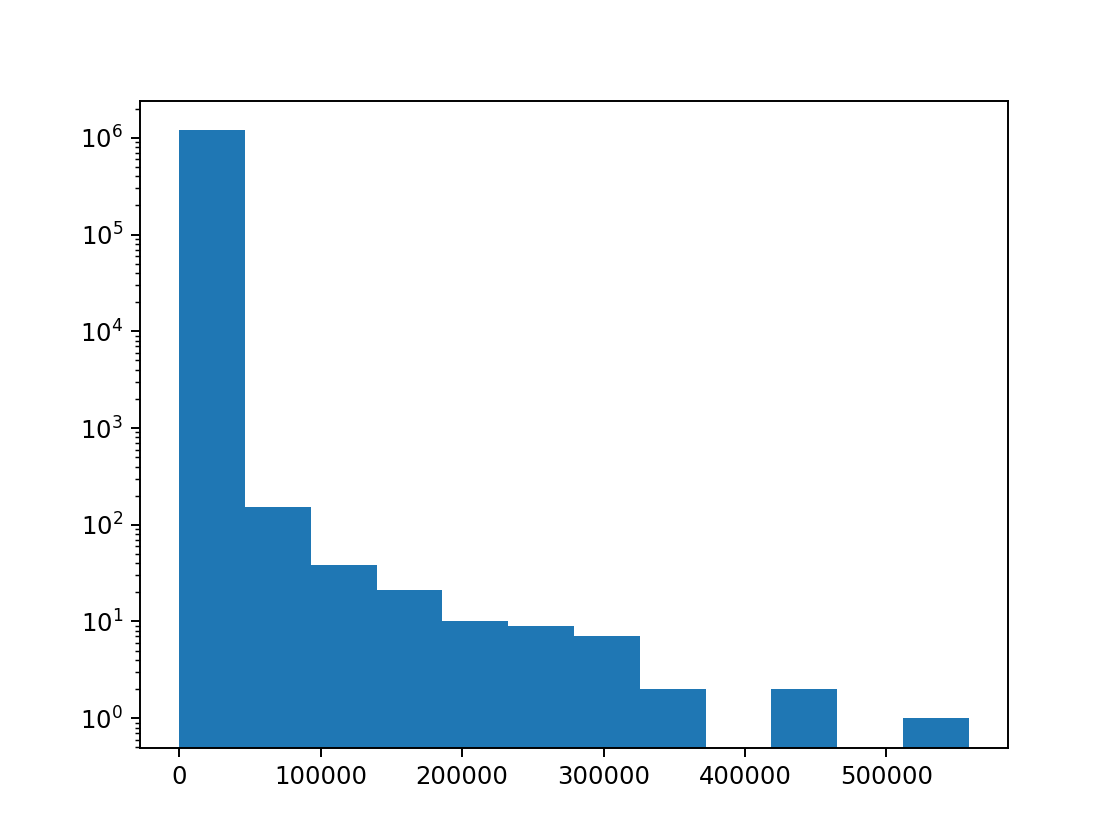

In [74]:
fig, ax = plt.subplots()
fires.FIRE_SIZE.hist(ax=ax, bins=12, bottom=0)
ax.set_yscale('log')
ax.grid(False)

In [139]:
larger_fires = get_fires_in_range(fires, 4000, 1000000)
small_fires = get_fires_in_range(fires, 0, 3999.99)
# Sample 1000 small fires
small_fires = small_fires.sample(n=1000)

In [140]:
small_fires['AQI_CHANGE'] = small_fires.apply(lambda row: get_aqi_change(aqi, row, (0, 14)), axis=1)
small_fires = small_fires[pd.notnull(small_fires.AQI_CHANGE)]
small_fires

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,AQI_CHANGE
274342,NaN,2007,5.97,2007-09-27,NaN,Lightning,Georgia,Muscogee,13,215,-0.344349
67214,LODGE,2004,0.10,2004-07-14,2004-07-14,Lightning,Arizona,Coconino,4,5,0.305656
743733,NaN,2014,0.10,2014-04-12,2014-05-06,Arson,New York,Tompkins,36,109,0.324139
165256,NaN,2005,0.10,2005-04-21,NaN,Miscellaneous,Connecticut,Tolland,9,13,-0.122896
756159,NaN,2007,0.10,2007-05-27,2007-05-27,Smoking,New York,Chemung,36,15,0.453762
...,...,...,...,...,...,...,...,...,...,...,...
215524,NaN,1993,6.00,1993-05-15,NaN,Railroad,Florida,Citrus,12,17,0.119879
848282,LOOKOUT,2015,0.10,2015-07-08,2015-07-08,Lightning,Oregon,Douglas,41,19,-0.394023
105096,S DOCKERY AV SANGER,2011,1.00,2011-07-31,NaN,Powerline,California,Fresno,6,19,0.159933
118939,WHITMORE,2013,1.00,2013-08-22,2013-08-22,Missing/Undefined,California,Shasta,6,89,0.021020


In [141]:
larger_fires['AQI_CHANGE'] = larger_fires.apply(lambda row: get_aqi_change(aqi, row, (0, 14)), axis=1)
larger_fires = larger_fires[pd.notnull(larger_fires.AQI_CHANGE)]
larger_fires

/home/froi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,AQI_CHANGE
37,140 FUNNY RIVER,2014,196722.2,2014-05-19,2014-08-31,Missing/Undefined,Alaska,Kenai Peninsula,2,122,2.361610
228,15392 BEADY,2015,4861.3,2015-06-20,2015-09-10,Lightning,Alaska,Yukon Koyukuk,2,290,1.187408
229,15573 SULUKNA,2015,16703.6,2015-06-23,2015-09-29,Lightning,Alaska,Yukon Koyukuk,2,290,4.509029
230,15249 INNOKO RIVER,2015,8660.9,2015-06-03,2015-08-21,Lightning,Alaska,Yukon Koyukuk,2,290,-0.331625
233,15359 THREE DAY,2015,97303.0,2015-06-19,2015-09-10,Lightning,Alaska,Yukon Koyukuk,2,290,1.187408
...,...,...,...,...,...,...,...,...,...,...,...
1200504,HENDERSON,2000,8390.0,2000-08-19,2000-08-21,Lightning,Wyoming,Natrona,56,25,0.963261
1200572,SAWMILL,2006,16503.0,2006-07-18,2006-08-09,Lightning,Wyoming,Natrona,56,25,0.505882
1200578,JACKSON CANYON,2006,11765.0,2006-08-14,2006-08-29,Lightning,Wyoming,Natrona,56,25,0.850980
1200968,SHEEPHERDER HILL,2012,15556.0,2012-09-09,2012-10-01,Missing/Undefined,Wyoming,Natrona,56,25,0.269404


<IPython.core.display.Javascript object>


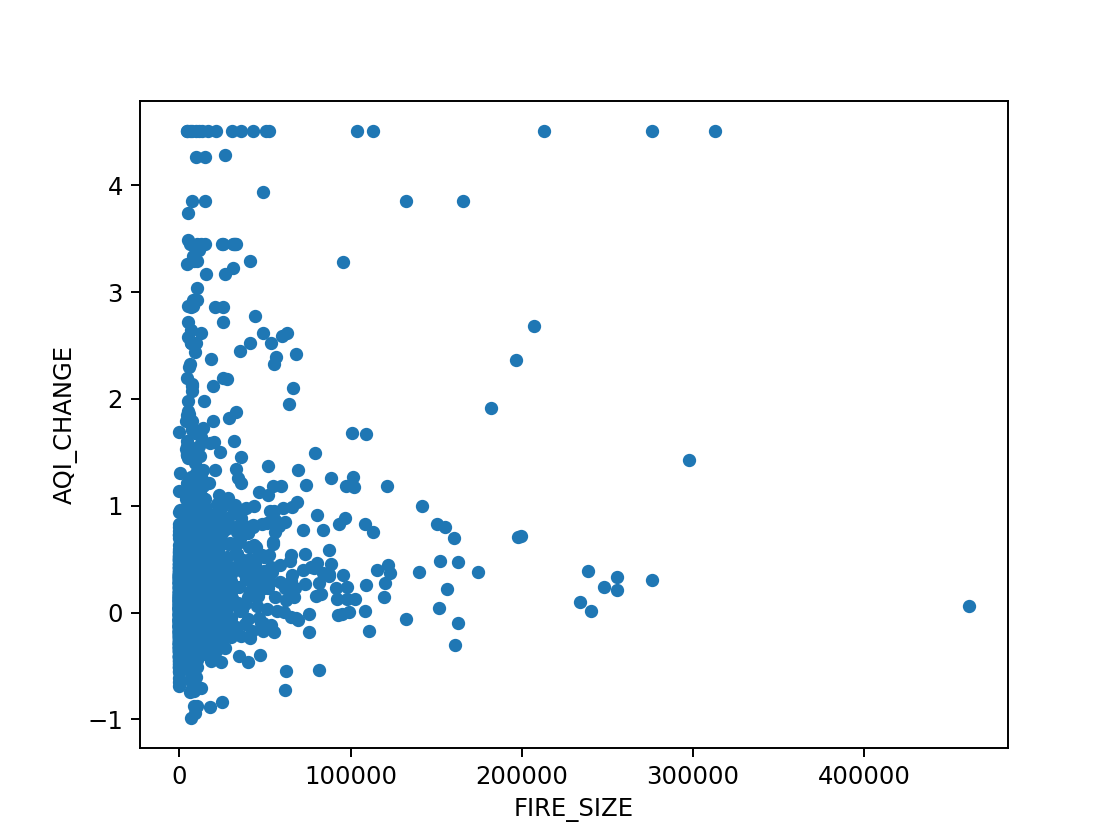

In [142]:
small_fires.append(larger_fires).plot.scatter(x='FIRE_SIZE', y = 'AQI_CHANGE')

In [143]:
larger_fires

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,AQI_CHANGE
37,140 FUNNY RIVER,2014,196722.2,2014-05-19,2014-08-31,Missing/Undefined,Alaska,Kenai Peninsula,2,122,2.361610
228,15392 BEADY,2015,4861.3,2015-06-20,2015-09-10,Lightning,Alaska,Yukon Koyukuk,2,290,1.187408
229,15573 SULUKNA,2015,16703.6,2015-06-23,2015-09-29,Lightning,Alaska,Yukon Koyukuk,2,290,4.509029
230,15249 INNOKO RIVER,2015,8660.9,2015-06-03,2015-08-21,Lightning,Alaska,Yukon Koyukuk,2,290,-0.331625
233,15359 THREE DAY,2015,97303.0,2015-06-19,2015-09-10,Lightning,Alaska,Yukon Koyukuk,2,290,1.187408
...,...,...,...,...,...,...,...,...,...,...,...
1200504,HENDERSON,2000,8390.0,2000-08-19,2000-08-21,Lightning,Wyoming,Natrona,56,25,0.963261
1200572,SAWMILL,2006,16503.0,2006-07-18,2006-08-09,Lightning,Wyoming,Natrona,56,25,0.505882
1200578,JACKSON CANYON,2006,11765.0,2006-08-14,2006-08-29,Lightning,Wyoming,Natrona,56,25,0.850980
1200968,SHEEPHERDER HILL,2012,15556.0,2012-09-09,2012-10-01,Missing/Undefined,Wyoming,Natrona,56,25,0.269404


In [144]:
small_fires

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,AQI_CHANGE
274342,NaN,2007,5.97,2007-09-27,NaN,Lightning,Georgia,Muscogee,13,215,-0.344349
67214,LODGE,2004,0.10,2004-07-14,2004-07-14,Lightning,Arizona,Coconino,4,5,0.305656
743733,NaN,2014,0.10,2014-04-12,2014-05-06,Arson,New York,Tompkins,36,109,0.324139
165256,NaN,2005,0.10,2005-04-21,NaN,Miscellaneous,Connecticut,Tolland,9,13,-0.122896
756159,NaN,2007,0.10,2007-05-27,2007-05-27,Smoking,New York,Chemung,36,15,0.453762
...,...,...,...,...,...,...,...,...,...,...,...
215524,NaN,1993,6.00,1993-05-15,NaN,Railroad,Florida,Citrus,12,17,0.119879
848282,LOOKOUT,2015,0.10,2015-07-08,2015-07-08,Lightning,Oregon,Douglas,41,19,-0.394023
105096,S DOCKERY AV SANGER,2011,1.00,2011-07-31,NaN,Powerline,California,Fresno,6,19,0.159933
118939,WHITMORE,2013,1.00,2013-08-22,2013-08-22,Missing/Undefined,California,Shasta,6,89,0.021020


<IPython.core.display.Javascript object>


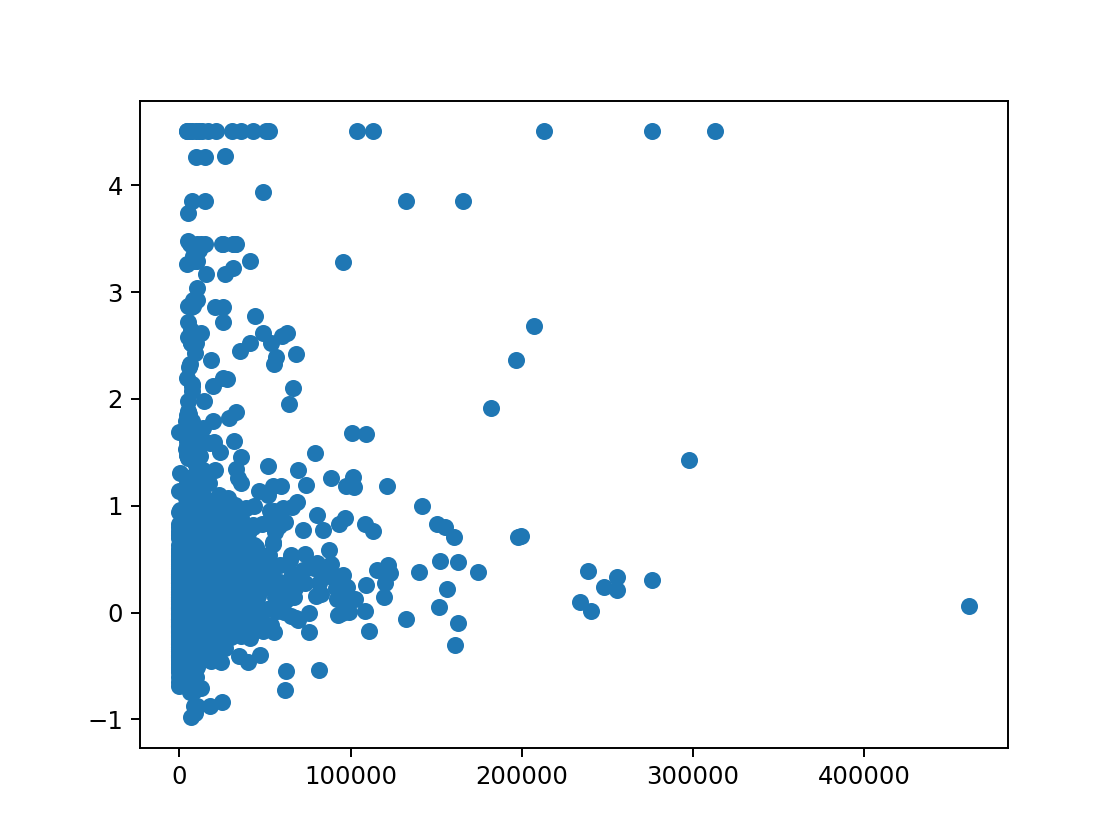

In [148]:
fig, ax = plt.subplots()
fire_plots = small_fires.append(larger_fires)
ax.scatter(fire_plots['FIRE_SIZE'], fire_plots['AQI_CHANGE'])
ax.grid(False)

In [149]:
random_fires = fires.sample(n=2000)

In [151]:
random_fires['AQI_CHANGE'] = random_fires.apply(lambda row: get_aqi_change(aqi, row, (0, 14)), axis=1)
random_fires = random_fires[pd.notnull(random_fires.AQI_CHANGE)]
random_fires

,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,STAT_CAUSE_DESCR,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,AQI_CHANGE
408574,NaN,2005,0.10,2005-08-21,NaN,Missing/Undefined,Hawaii,Honolulu,15,3,-0.300044
1096987,TABBY,2001,0.50,2001-07-03,2001-07-04,Lightning,Utah,Tooele,49,45,-0.008408
248886,NaN,2000,10.00,2000-01-08,NaN,Equipment Use,Florida,Miami-Dade,12,86,-0.101701
1190870,308 TRANQUILITY WAY,2014,0.10,2014-03-22,2014-03-22,Debris Burning,West Virginia,Monongalia,54,61,-0.318305
897463,NaN,2003,3.00,2003-10-03,NaN,Children,South Carolina,Lexington,45,63,-0.034285
...,...,...,...,...,...,...,...,...,...,...,...
826290,0458,2007,0.10,2007-07-12,2007-07-12,Equipment Use,Oregon,Deschutes,41,17,-0.066028
170009,NaN,2000,6.00,2000-02-04,NaN,Railroad,Florida,Marion,12,83,0.149674
477983,BRAINTREE,2015,1.00,2015-07-08,2015-07-08,Campfire,Massachusetts,Norfolk,25,21,0.064120
817748,30396,2003,120.00,2003-04-02,2003-04-02,Arson,Oklahoma,Adair,40,1,0.427638


<IPython.core.display.Javascript object>


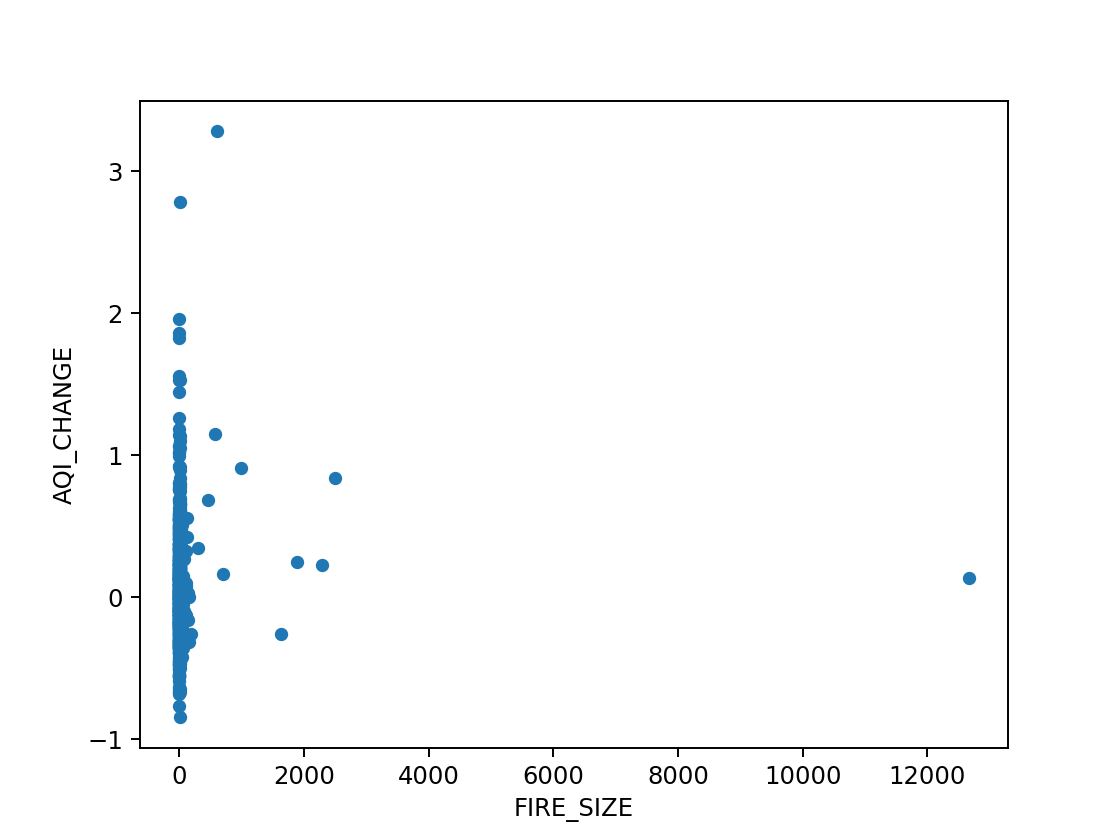

In [152]:
random_fires.plot.scatter(x='FIRE_SIZE', y = 'AQI_CHANGE')

<IPython.core.display.Javascript object>


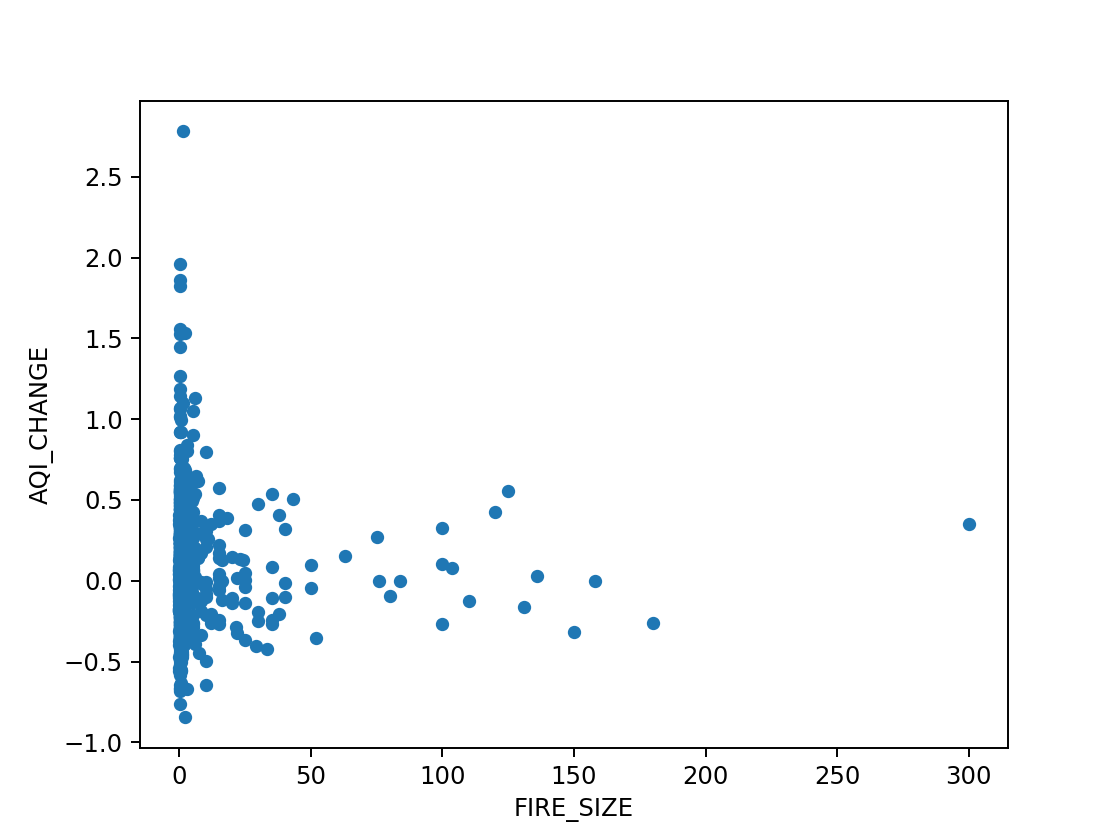

In [157]:
get_fires_in_range(random_fires, 0, 300).plot.scatter(x='FIRE_SIZE', y = 'AQI_CHANGE')

In [35]:
random_aqis = aqi.sample(n=1000)

In [36]:
random_aqis

,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,DATE,AQI,CATEGORY,DEFINING_PARAMETER,DEFINING_SITE,NUMBER_OF_SITES_REPORTING,YEAR
5269556,Arizona,Coconino,4,5,2010-10-06,45,Good,Ozone,04-005-8001,2,2010
6569757,Wisconsin,Ashland,55,3,2013-10-17,25,Good,Ozone,55-003-0010,1,2013
4686440,Illinois,Jersey,17,83,2008-07-17,159,Unhealthy,Ozone,17-083-1001,1,2008
713419,South Carolina,Charleston,45,19,1994-05-24,87,Moderate,Ozone,45-019-0046,3,1994
3007112,West Virginia,Hancock,54,29,2002-03-31,41,Good,PM10,54-029-0009,8,2002
...,...,...,...,...,...,...,...,...,...,...,...
3100197,Illinois,Rock Island,17,161,2003-08-05,54,Moderate,PM2.5,17-161-3002,1,2003
7062361,Minnesota,Saint Louis,27,137,2015-11-01,17,Good,PM2.5,27-137-7001,5,2015
2551459,Mississippi,Jackson,28,59,2001-01-05,16,Good,SO2,28-059-0006,1,2001
5878510,Texas,Rockwall,48,397,2011-10-06,50,Good,Ozone,48-397-0001,1,2011


In [37]:
def get_aqi_change2(aqi, row, days):
    date = row.DATE
    state_code = row.STATE_CODE
    county_code = row.COUNTY_CODE
    days_before = days[0]
    days_after = days[1]
    
    avg_aqi, avg_year_aqi = compare_aqi_with_year(aqi, state_code=state_code, county_code=county_code, date=date, days_before=days_before, days_after=days_after)
    if avg_aqi is None or avg_year_aqi is None:
        return None
    
    return (avg_aqi-avg_year_aqi)/avg_year_aqi

In [38]:
random_aqis.describe()

,STATE_CODE,COUNTY_CODE,AQI,NUMBER_OF_SITES_REPORTING,YEAR
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,29.812000,77.938000,44.770000,2.331000,2004.386000
std,16.793352,86.495825,39.499384,2.879537,6.755786
min,1.000000,1.000000,0.000000,1.000000,1992.000000
25%,17.000000,25.000000,27.000000,1.000000,1999.000000
50%,30.000000,59.000000,40.000000,1.000000,2005.000000
75%,42.000000,103.000000,52.000000,3.000000,2010.000000
max,80.000000,810.000000,911.000000,32.000000,2015.000000


In [39]:
random_aqis['AQI_CHANGE'] = random_aqis.apply(lambda row: get_aqi_change2(aqi, row, (0, 14)), axis=1)
random_aqis = random_aqis[pd.notnull(random_aqis.AQI_CHANGE)]
random_aqis

,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,DATE,AQI,CATEGORY,DEFINING_PARAMETER,DEFINING_SITE,NUMBER_OF_SITES_REPORTING,YEAR,AQI_CHANGE
5269556,Arizona,Coconino,4,5,2010-10-06,45,Good,Ozone,04-005-8001,2,2010,-0.139866
6569757,Wisconsin,Ashland,55,3,2013-10-17,25,Good,Ozone,55-003-0010,1,2013,-0.273496
4686440,Illinois,Jersey,17,83,2008-07-17,159,Unhealthy,Ozone,17-083-1001,1,2008,0.378479
713419,South Carolina,Charleston,45,19,1994-05-24,87,Moderate,Ozone,45-019-0046,3,1994,-0.052914
3007112,West Virginia,Hancock,54,29,2002-03-31,41,Good,PM10,54-029-0009,8,2002,-0.092879
...,...,...,...,...,...,...,...,...,...,...,...,...
3100197,Illinois,Rock Island,17,161,2003-08-05,54,Moderate,PM2.5,17-161-3002,1,2003,0.285249
7062361,Minnesota,Saint Louis,27,137,2015-11-01,17,Good,PM2.5,27-137-7001,5,2015,-0.150600
2551459,Mississippi,Jackson,28,59,2001-01-05,16,Good,SO2,28-059-0006,1,2001,-0.415869
5878510,Texas,Rockwall,48,397,2011-10-06,50,Good,Ozone,48-397-0001,1,2011,0.007422


In [40]:
random_aqis.AQI_CHANGE.describe()

count    1000.000000
mean        0.003565
std         0.335276
min        -1.000000
25%        -0.201850
50%        -0.040483
75%         0.173306
max         3.263504
Name: AQI_CHANGE, dtype: float64

In [170]:
fire_plots.AQI_CHANGE.describe()

count    1769.000000
mean        0.403787
std         0.819843
min        -0.981804
25%        -0.031567
50%         0.203813
75%         0.518473
max         4.509029
Name: AQI_CHANGE, dtype: float64

In [172]:
larger_fires.AQI_CHANGE.describe()


count    1300.000000
mean        0.531177
std         0.906719
min        -0.981804
25%         0.028408
50%         0.288922
75%         0.703088
max         4.509029
Name: AQI_CHANGE, dtype: float64

In [183]:
get_aqi(aqi, state_code=35, county_code=17, date="2015-04-21", days_after=7)

,Unnamed: 0,STATE_NAME,COUNTY_NAME,STATE_CODE,COUNTY_CODE,DATE,AQI,CATEGORY,DEFINING_PARAMETER,DEFINING_SITE,NUMBER_OF_SITES_REPORTING,YEAR
7094462,7098512,New Mexico,Grant,35,17,2015-04-21,0,Good,SO2,35-017-1003,1,2015
7094463,7098513,New Mexico,Grant,35,17,2015-04-22,0,Good,SO2,35-017-1003,1,2015
7094464,7098514,New Mexico,Grant,35,17,2015-04-23,0,Good,SO2,35-017-1003,1,2015
7094465,7098515,New Mexico,Grant,35,17,2015-04-24,0,Good,SO2,35-017-1003,1,2015
7094466,7098516,New Mexico,Grant,35,17,2015-04-25,0,Good,SO2,35-017-1003,1,2015
7094467,7098517,New Mexico,Grant,35,17,2015-04-26,0,Good,SO2,35-017-1003,1,2015
7094468,7098518,New Mexico,Grant,35,17,2015-04-27,0,Good,SO2,35-017-1003,1,2015
7094469,7098519,New Mexico,Grant,35,17,2015-04-28,0,Good,SO2,35-017-1003,1,2015
